# Your Name: Zhengyi Chen(Skye)_

# Your NetID: zc969_

***

# Homework 3 - Part B

### <div style="color: red">Read Carefully Before Proceeding</div>

If you are having issues running this code because of missing libraries, check the material that we've done in class for installation instructions. This code uses what we have already seen, so if you've been able to execute the code of the Notebooks we've seen in class, you will be fine here as well.


You need to answer all questions. Make sure that you answer both **technical** (code-related) and **non-technical** (conceptual) parts of this homework. A lot of code is already available for you, and you can build on that. You are free to use code from our notebooks in class.  All visualizations must be generated by your code, programmatically.


Once you're done, download the notebook via `File` -> `Download as` -> `Notebook`, which will fetch a file with an ".ipynb" extension. Include this file in your submission, as a separate document -- **not** in the word / pdf submission itself. In case you use additional code stored in another directory, make sure to submit that as well.

***

### Part 4 - Mailing Campaign Revisited

This homework (mostly) expands on the problem that we've been working with in class: a mailing campaign. The main objective is for you to get a better grasp of a predictive model's performance.

In the `data` directory of this homework, you will find two files: `mail_train.tsv` and `mail_test.tsv`.

**For now**, use only the `mail_train.tsv` file.

For your convenience, both files have **already** been dummysized.

***

Like we usually do, start by loading the libraries of interest.

In [3]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8


**Read the files**

Let's start by reading our training data: the `mail_train.tsv` file.  Again, for now, you can / should omit the test data file entirely.

In [4]:
# Let's read the file
train_df = pd.read_csv("data/mail_train.tsv",  sep='\t')

# Let's print the top-5 rows
train_df.head()


,INCOME,WEALTH1,HIT,NUMPRM12,NGIFTALL,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,...,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MAJOR_,MAJOR_X,PEPSTRFL_,PEPSTRFL_X,GENDER_A,TARGET_B
0,7,9,1.0,14.0,37.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,0
1,1,4,0.0,7.0,6.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,0
2,3,3,5.0,22.0,11.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,0
3,4,4,0.0,10.0,18.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,1
4,7,9,1.0,14.0,12.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,1


### P4.2 - Model Training and Complexity Control

Let's go back to our mailing campaign.  As part of your work here, you will need to pick 3 classifiers:

* Logistic Regression 
* Decision Trees
* A third classifier of your choice.  (k-NN, Naive Bayes, SVMs, etc)


For each of your models, you need to do complexity control, to make sure that it is not overfitting. As we have discussed in the class and seen during the lectures, we can use **cross validation** (on the _training dataset_) to achieve this goal. Therefore, for each model:

* You must pick a **complexity parameter** (e.g., $k$, $\lambda$, depth, etc)
* You need to select a **meaningful range of values** for the complexity parameter to test
* For each compexity parameter, evaluate your model's performance using **10-fold cross validation**.
* You must **collect and analyze** the results
* You must pick the **right complexity parameter value** following your analysis. You do _not_ have to create fitting graphs, unless you want to, but your work needs to make it clear **how** you came to the conclusion that this was the right parameter. That is, you need to support your reasoning with code and / or plots, or similar technique.

**Suggestion:** Do the above for **1** model first (e.g., Logistic Regression). Once you've done that, you can copy-paste your code for the other 2 models, making sure that you choose the proper evaluation parameter each time.

#### Model 1

In [5]:
# Model 1 - Your code here
#decision tree--complexity parameter is depth
def separate_features_and_labels(dframe):
    labels = dframe['TARGET_B']  
    features = dframe.drop(columns = ["TARGET_B"])   
    return features, labels 

#first seperate the labels and features.
train_feats, train_labels = separate_features_and_labels(train_df)


tree_clf = DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(train_feats, train_labels)

acc_train = metrics.accuracy_score(tree_clf.predict(train_feats), train_labels)
acc_train


0.9998964267219057

In [6]:
# compute the average 10-fold Cross Validation accuracy score
def cv_eval( max_d, min_leaf, x_train, y_train ):

    # Create a decision tree classifier with the maximum depth and min leaf size that are given as parameters.
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_d, min_samples_leaf=min_leaf)

    # Run 3-fold cross validation using the model we created in this method,
    # the features x_train and the labels y_train that we we also got as parameters.
    cv10_acc = np.mean(cross_val_score(dt_clf, x_train, y_train, cv=10)) 

    return cv10_acc  # Return the proper value


Text(0, 0.5, 'Accuracy')

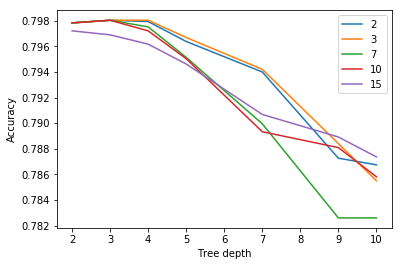

In [7]:
# Generate the required accuracy values for each combination
# Check the sample code above with the nested for-loop

depths_list = [2,3,4,5,7,9,10]   # Put your depth values here. The depth values are the xvals from before.
min_leaf_size_list = [2,3,7, 10, 15]   # Put your min leaf size here

# Let's split the training data again
train_feats, train_labels  =  separate_features_and_labels(train_df)

# We will use a dataframe because it has a simple-to-use plotting function.
df = pd.DataFrame(index=depths_list, columns=min_leaf_size_list)

for v in min_leaf_size_list:  # This loop controls the different lines

    l = []
    for d in depths_list:
        
        # Use the cv_eval() method that we implemented. Pass the parameters in the right order
        acc = cv_eval( d, v, train_feats, train_labels )
        l.append(acc)

    df[v] = l  #Store the result to the dataframe for the particular line

# We can plot the contents of a dataframe with the plot() method
ax = df.plot()
ax.set_xlabel("Tree depth")
ax.set_ylabel("Accuracy")

**Complexity Parameter Selection**

_Your answer here_

***
From the graph above, I would pick `max_depth=4` and `min_samples_leaf=3`. My reasoning is:
* `max_depth = 4` yields the best cross-validation accuracy, so I expect good generalization performance. 
* For `min_samples_leaf`, I observe that the value 3 yields the best performance for `max_depth=4`. I see that the curve of `min_samples_leaf=3` decreases slower than other graphs and reaches the highest accuracy among others at  `max_depth=4`. Also, when tree depth is larger than 4, it also performs better since the graph is higher. 


#### Model 2

In [8]:
# Model 2 - Your code here
def separate_features_and_labels(dframe):
    labels = dframe['TARGET_B']  
    features = dframe.drop(columns = ["TARGET_B"])   
    return features, labels 

#first seperate the labels and features.
train_feats, train_labels = separate_features_and_labels(train_df)


model = LogisticRegression(C=10000,solver='lbfgs')   
model.fit(train_feats, train_labels)

acc_train = metrics.accuracy_score(model.predict(train_feats), train_labels)
acc_train


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.7968928016571725

In [9]:
# compute the average 10-fold Cross Validation accuracy score
def cv_eval_log(c,train_feats, train_labels):
    
    model = LogisticRegression(C=c,solver='lbfgs')   # Remember what a large C value means!!!
    model.fit(train_feats, train_labels)

    # Run 3-fold cross validation using the model we created in this method,
    # the features x_train and the labels y_train that we we also got as parameters.
    cv10_acc_log = np.mean(cross_val_score(model,train_feats, train_labels, cv=10)) 

    return cv10_acc_log  # Return the proper value

In [10]:
import warnings
warnings.filterwarnings('ignore')

l = []

In [11]:
acc = cv_eval_log(0.001, train_feats, train_labels)
l.append(acc)
acc

0.7974111710081363

In [12]:
acc2 = cv_eval_log(0.01, train_feats, train_labels)
l.append(acc2)
acc2

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.7971001824597312

In [13]:
acc3 = cv_eval_log(1, train_feats, train_labels)
l.append(acc3)
acc3

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.797100504727657

In [14]:
acc4 = cv_eval_log(100, train_feats, train_labels )
l.append(acc4)
acc4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

0.796893250619086

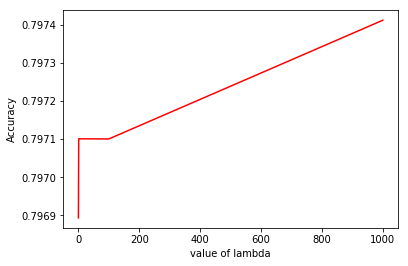

In [15]:
c = [0.001, 0.01, 1, 100]
val_lambda = []
for elem in c:
    val_lambda.append(1/elem)
    
plt.figure()
plt.xlabel("value of lambda")
plt.ylabel("Accuracy")
plt.plot(val_lambda, l, '-', color="r",label="accuracy")


**Complexity Parameter Selection**

_Your answer here_

***
Here from the graph above (or from each accuracy printed above), we can see that the model achieves highest accuracy when c = 0.001( $\lambda$ = 1000). Hence we choose c = 0.001( $\lambda$ = 1000).

#### Model 3

In [16]:
# Model 3 - Your code here
#KNN--complexity parameter is depth
def separate_features_and_labels(dframe):
    labels = dframe['TARGET_B']  
    features = dframe.drop(columns = ["TARGET_B"])   
    return features, labels 

#first seperate the labels and features.
train_feats, train_labels = separate_features_and_labels(train_df)

# Let's train a k-Nearest Neighbor classifier
model_KNN = KNeighborsClassifier(10, weights='distance')   # Also try it with weights='distance'
model_KNN.fit(train_feats, train_labels)

acc_train = metrics.accuracy_score(model_KNN.predict(train_feats), train_labels)
acc_train

0.9998964267219057

In [17]:
# compute the average 10-fold Cross Validation accuracy score
def cv_eval_knn(k,train_feats, train_labels):
    
    model = KNeighborsClassifier(k, weights='distance') 
    model.fit(train_feats, train_labels)
    # Run 3-fold cross validation using the model we created in this method,
    # the features x_train and the labels y_train that we we also got as parameters.
    cv10_acc_knn = np.mean(cross_val_score(model,train_feats, train_labels, cv=10)) 

    return cv10_acc_knn  # Return the proper value

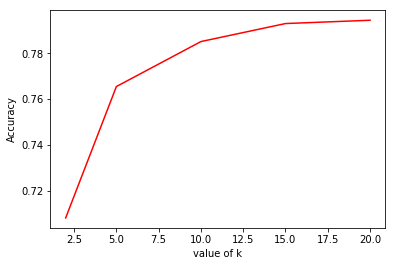

In [18]:
K = [2,5,10,15,20]
l = []
for k in K:
    # Use the cv_eval_log() method that we implemented. Pass the parameters in the right order
    acc = cv_eval_knn(k, train_feats, train_labels )
    l.append(acc)

# We can plot the contents of a dataframe with the plot() method
plt.figure()
plt.xlabel("value of k")
plt.ylabel("Accuracy")
plt.plot(K, l, '-', color="r",label="accuracy")


In [19]:
l

[0.7080382690046048,
 0.765512298060085,
 0.785188441718402,
 0.7930621640139875,
 0.7945121909638655]

**Complexity Parameter Selection**

_Your answer here_

***
From the plot, and also from the list of accuracy for each k, we can find that when $k = 20$, the model reaches the highest accuracy. Hence in the following step, we choose $k = 20$ for the model.

### P4.3 - Best Model: Winner takes all

Now that you have tuned the hyper-parameters of each model, you will compare them against each other. In particular, you will split the training dataset into 75% (sub)training and 25% for testing. With the **same** 75% of your (subtraining) data, you will train the 3 different models, with their best performing hyper-parameters - the ones you chose above.

You will then **test** the three models against the remaining **25%**. You will then **plot the ROC curve** for each model **on the same graph**. Make sure you have the proper legends in place and that they are visible.

The classifier (model) with the **best Area Under the ROC Curve (AUC)** on the 25% will be the winner.


When you split the data, you **must** specify the `random_state` parameter and set it to the numerical part of your NetID. 

**Remember:** For the ROC (and the AUC, subsequently), we want to have a _ranking_ of the predicted values. The ranking is obtained by predicting the _probability_ that an instance belongs to the class of interest (the "positive" class: user will donate). Our models can generate those probabilities right away; check our previous notebooks for which method to use.



<p/>
<div style="color: red"><b>Requirements:</b></div>


* **Split your training set** into 75% training, 25% testing. Use the `train_test_split` method. You **must** set the `random_state` to the numerical part of your NetID.
* **Train the 3 models** with the **best parameters** (selected earlier) on the 75% of the data. All models must be trained on the same subset.
* With each model, **compute the probability of the remaining 25%** to belong to the "positive" class. The "positive" class is that an individual will donate.
* Using those probabilities and the true outcomes, generate the necessary **information to plot the ROC curve**. ( `roc_curve()` )
* Using those probabilities and the true outcomes, also **compute the AUC**, for each of the 3 cases (`roc_auc_score()`).
* **Plot the three ROCs** together on the same graph for comparison.
* Pick the model that exhibits the **highest AUC** (based on the earlier computations).


In [20]:
###Rquirement1:Split your training set into 75% training, 25% testing. 
# Do not forget to set the random_state to the numerical part of your NetID

# Use the train_test_split method. You must set the random_state to the numerical part of your NetID-969.
x_train, x_test, y_train, y_test = train_test_split(train_feats, train_labels, train_size=0.75, random_state=969)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [21]:
###Requirement2:Train the 3 models with the best parameters (selected earlier) on the 75% of the data.
#train model 1, with max_depth = 4 and min_samples_leaf = 3
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)
tree_model.fit(x_train, y_train)
#train model 2, with c = 0.01
logreg_model = LogisticRegression(C=0.001,solver='lbfgs') 
logreg_model.fit(x_train, y_train)
#train model 3, with 20
knn_model = KNeighborsClassifier(20, weights='distance')
knn_model.fit(x_train, y_train)




KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='distance')

**With each model, compute the probability of the remaining 25%**

In [22]:
#  For each instance in the TEST DATA, get the probability that it belongs to the POSITIVE class (LEAVE=1)
Y_test_probability_1 = tree_model.predict_proba(x_test)[:, 1]
Y_test_probability_2 = logreg_model.predict_proba(x_test)[:, 1]
Y_test_probability_3 = knn_model.predict_proba(x_test)[:, 1]


In [23]:
# Use the roc_curve method to generate FPR and TPR
fpr_1, tpr_1, thresholds_1 = metrics.roc_curve(y_test, Y_test_probability_1)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, Y_test_probability_2)
fpr_3, tpr_3, thresholds_3 = metrics.roc_curve(y_test, Y_test_probability_3)


In [24]:
# Step 4: Compute the AUC for the ROC
auc_1 = metrics.roc_auc_score(y_test, Y_test_probability_1)
auc_2 = metrics.roc_auc_score(y_test, Y_test_probability_2)
auc_3 = metrics.roc_auc_score(y_test, Y_test_probability_3)


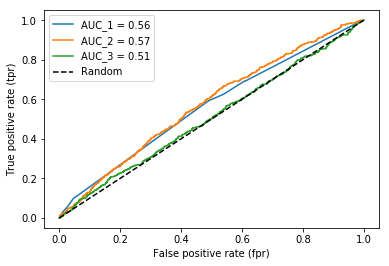

In [25]:
# Step 5: Plot the ROC curve. Report the AUC in the legend
plt.plot(fpr_1, tpr_1, label="AUC_1 = %.2f" % round(auc_1, 2))
plt.plot(fpr_2, tpr_2, label="AUC_2 = %.2f" % round(auc_2, 2))
plt.plot(fpr_3, tpr_3, label="AUC_3 = %.2f" % round(auc_3, 2))


plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=0)

### P4.4 - Which is the best performing model?

_Your answer here_
***

In [26]:
# Your code here
auc_list = [auc_1,auc_2,auc_3]
auc_list

[0.5625427470716654, 0.5737500422984516, 0.5074024854057524]

From the list of AUC of three models, the logistic regression model(model 2) with $\lambda= 1000$ has the largest AUC value, thus performs the best. 

Hence in the following session, i will focus on the logistic regression model.

***

### P4.6 - Target Audience Size

Imagine that you have a budget of \\$600 and each invitation costs \\$1.5. What is the maximum number of individuals can we target?

**Note:** This question is **independent of** a classifier.

_Your answer here_
***
Maximum number of individuals is reached when we spend all budget
$$\frac{600}{1.5} = 400$$


### P4.7 - Best-case Scenario

Assume for a moment that our classifiers can **perfectly** separate between the two classes. Also, each individual will donate (on average) \\$5.

* In this best-case scenario, how much do we expect to gather in donations?

* What will our profit be, after we account for the cost of sending the invites)?

Note that we are still bound by the budgetary constraint mentioned earlier.


**Note:** This question is **independent of** a classifier.

_Your answer here_
***
* Best case is that all invitations we send (400) invite a person. So 400 people come and each of them donate 5, which means we expect to gather $$400*5 = 2000$$.
* If account for the cost of sending the invites, the profit is $$2000-1.5*400 = 1400$$

### P4.8 - Generate a Profit Curve

Assume that each invitation costs **\$1.5**, and the average individual contribution (out of those who contribute) is **\$5**. Also, our budget is **\$600**.

To properly evaluate our approach for this type of problem, we need to use profit curves. Here, you'll generate a profit curve using your best performing classifier, which you picked earlier (based on the AUC measure).

With that, you will **train your classifier on the 75% split** of the training data and you will **generate a Profit Curve** by applying it on the remaining 25% of the (training) data. In case you use the `train_test_split` method again, you **must** specify the `random_state` parameter and set it to the numerical part of your NetID.

Recall that for a profit curve, you need to predict the probability of an instance to be in the "will donate" (positive) class. Check Module 5 for code to generate a Profit Curve.


In [27]:
# Your code here
benefit = 5
loss = -1.5
cost_matrix = pd.DataFrame([[benefit, loss], [0, 0]], 
                           columns=['(True) p', '(True) n'], 
                           index=['[Predicted] Y', '[Predicted] N'])
cost_matrix

,(True) p,(True) n
[Predicted] Y,5,-1.5
[Predicted] N,0,0.0


In [28]:
# Use the train_test_split method. You must set the random_state to the numerical part of your NetID-969.
x_train, x_test, y_train, y_test = train_test_split(train_feats, train_labels, train_size=0.75, random_state=969)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
# Train a decision tree classifier with some parameters
logreg_model = LogisticRegression(C=0.001,solver='lbfgs') 
logreg_model.fit(x_train, y_train)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
# Get the false positive rate, true positive rate, and all thresholds
Y_test_probability_2 = logreg_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, Y_test_probability_2)


In [31]:
p_p = np.sum(y_test)/len(y_test)

p_n = 1 - p_p 


In [32]:
# To estimate our profit we use our TRUE POSITIVES and we want to convert these to 
#based on Bayes thm, see note
actual_profit = cost_matrix['(True) p']['[Predicted] Y'] * tpr * p_p

# To estimate our profit we use our FALSE POSITIVES
actual_cost = cost_matrix['(True) n']['[Predicted] Y'] * fpr * p_n


In [33]:
# Expected profits:
expected_profits = actual_profit + actual_cost


In [34]:
# We will use the thresholds here to compute how many users are above it
n_targeted = []
for t in thresholds:
    above_threshold = Y_test_probability_2  >= t
    above_thres_count = np.sum(above_threshold)
    n_targeted.append( above_thres_count )

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted) / len(y_test)

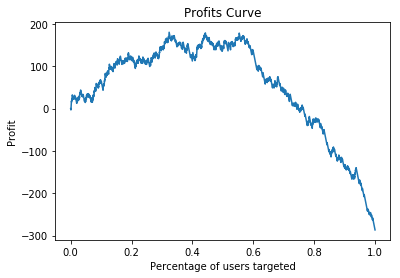

In [35]:
Size_targeted_pop = float(len(y_test))

# Plot the profit curve
plt.plot(n_targeted, Size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profits Curve")
plt.show()

From the profit curve, the profit at 33%, 45% and 58% seems to be approximately equivalent and reach the maximum point of the whole graph. In this case, we should choose to target 33% of users since the cost is minimized comparing with other two points and the profit is approximately the same.  

***

### P4.9 - Best Threshold

Using your earlier code and results, answer the following questions.
<div style="color: red">Your answers must be answered using code, not approximate estimations from the graph above.</div>



**1.** For which threshold does your model hit its maximum?

**2.** How many people should be invited (according to the model) to hit the maximum profit?

**3.** Can you invite that many people? Why / Why not ?

**4.** What will be your _actual_ profit, based on how many people you will finally invite? What is your _actual_ threshold?



**Hint:** Let's say that you have stored the expected profits in a variable called `expected_profits`, as was done in the notebook of Module 5. To help you answer this question, you need to find the position in the `expected_profits` that the value gets maximum. You can easily find that position by doing: `np.argmax(expected_profits)`. 

**Attention:** That method does _not_ tell you what the maximum is. It does not say what the threshold is either.
It will only give you the _index_ in the `expected_profits` array that has the max value. See the code below for an example.

We are passing an entire list as an argument and we ask: what is the index in the list that has the maximum element ? Recall that _indexing_ in Python starts from 0, i.e., the 1st element is at index 0, the 2nd element is at index 1, and so on.


In [36]:
# Simple list
l = [ 2, 1, 5, 8, -1 ]
np.argmax( l )

3

The code above says that the maximum element is at index 3. If we then do `l[3]`, the result we will get will be 8 (the actual max value)!

Use the `np.argmax( expected_profits )` to find where the expected profits becomes maximum for your classifier. Using that index result, you can then "probe" any other arrays that you are using to store the thresholds or the number of people who are targeted (i.e., invited) and so on.

In [37]:
# Your code here
ind = np.argmax(expected_profits) 
thre = thresholds[ind]
thre

0.21332961535517905

In [38]:
#percentage when the model reaches maximum
perc = n_targeted[ind]
perc

0.3235294117647059

In [39]:
Size_targeted_pop = float(len(y_test))
invite = Size_targeted_pop*perc
invite

781.0

**1.** For which threshold does your model hit its maximum?

From the code above, the model hits the maximum when threshold = 0.21332961535517905
    
   
**2.** How many people should be invited (according to the model) to hit the maximum profit?

From the code above, the people we should invite is: the percentage of users we want to invite * #total user = 781.
    
    
     
**3.** Can you invite that many people? Why / Why not ?

However, we can not invite that many people since our budget is 600 and each invitation costs 1.5, this means that if we invite 781 people, the cost would be $781*1.5 = 1171.5$, which is larger than the budget. 

In [40]:
#maximum percentage we can invite
# 400 comes from the maximum number of invitation we can send
max_p = 400/Size_targeted_pop
max_p

0.16570008285004142

In [41]:
#find the maximum profit in a reachable range
new_expected_profits = expected_profits[:int(max_p*len(expected_profits)//1+1)]
new_ind = np.argmax(new_expected_profits) 
new_ind

123

In [42]:
new_perc = n_targeted[new_ind]
new_perc

0.1271748135874068

In [43]:
new_thre = thresholds[new_ind]
new_thre

0.2494959872151807

In [44]:
Size_targeted_pop = float(len(y_test))
new_invite = Size_targeted_pop*new_perc
new_invite

307.0

Question 4: What will be your actual profit, based on how many people you will finally invite? What is your actual threshold?

**According to the code above, we will target 307 users. The cost of invitation is $307*1.5 = 460.5$, and the money earned would be $307*5 = 1535$. Hence the maximum profit is $$1535-460.5 = 1074.5$$**

### P4.9 - Deployment time

It is time to send out invitations. To do so, you will rely on the results of your best performing classifier.

- Train your _best performing_ model on the entire training dataset. 

### <div style="color: red">DO NOT TRAIN THE MODEL ON THE TESTING DATA</div>

- Apply your model on the testing dataset and get the probability, for each test instance, to donate.

- You will invite the individuals based on the earlier results. You may only invite people who have a probability greater than the _threshold_ that you picked earlier. Remember that you also have a _cap_ on the number of people who can be invited.

Following the above guidelines - and restrictions -, implement your solution so that you can answer the following questions;

1. How many people will you invite?
1. How much profit will you make? 
1. Given your budget and your profit, does / did it make sense to target those individuals?

In [45]:
# Let's read the test file
test_df = pd.read_csv("data/mail_test.tsv",  sep='\t')

# Let's print the top-5 rows
test_df.head()


,INCOME,WEALTH1,HIT,NUMPRM12,NGIFTALL,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,...,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MAJOR_,MAJOR_X,PEPSTRFL_,PEPSTRFL_X,GENDER_A,TARGET_B
0,6,6,6.0,12.0,2.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,0
1,2,3,4.0,12.0,14.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,1
2,5,5,0.0,13.0,12.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,0
3,4,9,0.0,7.0,6.0,0.0,0.0,0,1,0,...,1,0,0,0,1,0,1,0,0.0,0
4,2,1,0.0,14.0,2.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0


In [46]:
# Your code here
#first separate the label and features
def separate_features_and_labels(dframe):
    labels = dframe['TARGET_B']  
    features = dframe.drop(columns = ["TARGET_B"])   
    return features, labels 

#first seperate the labels and features.
train_feats, train_labels = separate_features_and_labels(train_df)
test_feats, test_labels = separate_features_and_labels(test_df)

In [47]:
#train the model on the whole training set
logreg_model = LogisticRegression(C=0.001,solver='lbfgs') 
logreg_model.fit(train_feats, train_labels)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
#Apply your model on the testing dataset and get the probability, for each test instance, to donate.
Y_test_probability = logreg_model.predict_proba(test_feats)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(test_labels , Y_test_probability)

In [49]:
# You may only invite people who have a probability greater than the threshold that you picked earlier. 
# from previous result, the threshold is:
new_thre

0.2494959872151807

_Your answer here_

**Answer for: How many people will you invite?**

In [50]:
#count the number of instance that the probability is larger than threshold.
num = 0
for elem in Y_test_probability:
    if elem >= new_thre:
        num += 1
num

433

From the code above, we know that the number of instance that the probability is larger than threshold is 433, however, due to the cap on the number of people we can invite (400), we can only invite $\min(num = 433, cap = 400) = 400$ people. 

**Answer for: How much profit will you make? **

Based on previous answer, the number of people we are going to invite is $400$. Hence the profit would be $400*5-1.5*400 = 1400$.

**Answer for: Given your budget and your profit, does / did it make sense to target those individuals? **

Yes, since we know that if we want to invite people whose probability to come is predicted to be larger than the threshold, if there are many people satisfy this condition, we should invite them as long as the cost does not exceed the budget. In our case, we should target 433 people but that would exceed the budget, hence we choose to target 400 of them with the top 400 probability rank.  


***